In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('data/Machine_Learning/05_data1.xlsx')

In [28]:
data.info

<bound method DataFrame.info of         no  city_code  gender  age_code  height  weight  waist  systolic  \
0        1         36       1         9     165      60   72.1       127   
1        5         41       2        12     155      50   75.2       144   
2        6         27       1         9     185      85   94.0       114   
3        7         44       1         9     165      80   93.0       112   
4        9         41       2        17     150      50   82.0       136   
...    ...        ...     ...       ...     ...     ...    ...       ...   
2995  7648         31       2        11     155      55   68.0       132   
2996  7650         42       1        13     155      60   79.0       123   
2997  7651         41       1         9     165      60   85.0       118   
2998  7652         42       1         9     180      90   97.0       148   
2999  7659         44       1        11     160      65   89.8       125   

      diastolic  blood_sugar  cholesterol  triglyceride

In [29]:
data6 = data.loc[:,['gender','height','weight','waist','drinking','smoking']]
data6.loc[data6['gender']==1,['gender']]='M'
data6.loc[data6['gender']==2,['gender']]='F'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'
data6.loc[data6['smoking']==1,['smoking']]='Non-smoking'
data6.loc[data6['smoking']==2,['smoking']]='Quit-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'







In [30]:
from datetime import datetime
a=datetime.now()

print(type(a))
# print(a.replace('-',''))
# datetime.strptime(a.replace('-',''), "%Y.%m.%d")
print(a.strptime("%Y.%m.%d"))

<class 'datetime.datetime'>


TypeError: strptime() takes exactly 2 arguments (1 given)

In [ ]:
drinking = data6.groupby(['gender','drinking'])['drinking'].count()
smoking = data6.groupby(['gender','smoking'])['smoking'].count()

drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')
drinking = drinking.reset_index()
smoking = smoking.reset_index()


In [ ]:
fig = plt.figure(figsize=(12,10))
fig.suptitle('2020 Health Check Drinking & Smoking Type Bar Graph',
             fontweight='bold')
index1 = np.arange(4)
index2 = np.arange(6)
fig.add_subplot(2,1,1)
plt.bar(index1,drinking['count'])
plt.title('Drinking Type')
plt.ylabel('Count')
plt.xticks(index1,['Non-drinking(M)','Drinking(M)','Non-drinking(F)','Drinking(F)'])
#각항목을 설정하는것이 xticks 이다 .
fig.add_subplot(2,1,2)
plt.bar(index2,smoking['count'])
plt.title('Smoking Type')
plt.ylabel('Count')
plt.xticks(index2,['Non-smoking(M)','Quit-Smoking(M)','Smoking(M)','Non-smoking(F)','Quit-Smoking(F)','Smoking(F)'])
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,12))
area1 = fig.add_subplot(2,1,1)
area2 = fig.add_subplot(2,1,2)
ax1 = sns.barplot(x='gender',y='count',hue='drinking',data=drinking,ax=area1)
ax2 = sns.barplot(x='gender',y='count',hue='smoking',data=smoking,ax=area2)
fig.suptitle('2020 Health Check Drinking & Smoking Type Seaborn Bar Graph',fontweight='bold')
area1.set_title('Drinking Type')
area1.set_title('Smoking Type')
plt.show()

In [32]:
maledata = data6.loc[data6.gender=='M',['gender','height','weight','waist','drinking','smoking']]
femaledata = data6.loc[data6.gender=='F',['gender','height','weight','waist','drinking','smoking']]
maledata.to_excel('test.xlsx')
femaledata.to_excel('test1.xlsx')


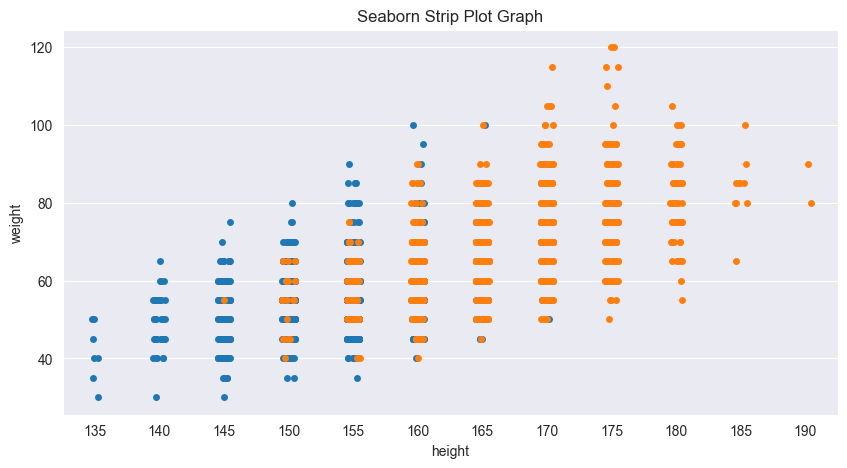

In [33]:
plt.close()
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph')
sns.stripplot(x='height',y='weight',data=femaledata)
sns.stripplot(x='height',y='weight',data=maledata)

plt.show()


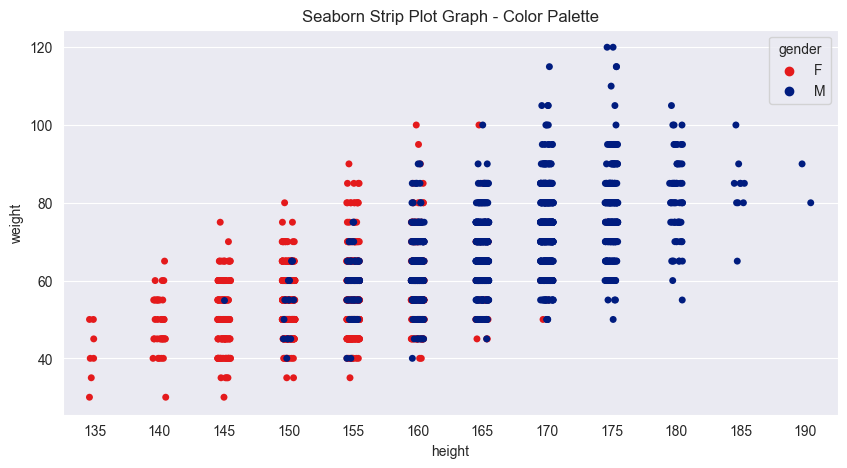

In [34]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph - Color Palette')
sns.stripplot(x='height',y='weight',data=femaledata,hue='gender',palette='Set1')
sns.stripplot(x='height', y='weight', data=maledata, hue='gender', palette='dark')

plt.show()

D:\machine_learning\venv\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


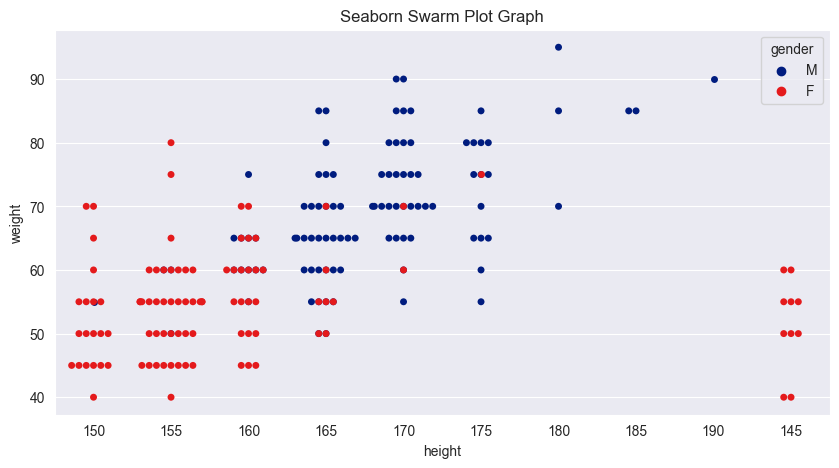

In [35]:
maledata100 = maledata.head(100)
femaledata100 = femaledata.head(100)
plt.figure(figsize=(10,5))
plt.title('Seaborn Swarm Plot Graph')
sns.swarmplot(x='height',y='weight',data=maledata100,hue='gender',palette='dark')
sns.swarmplot(x='height',y='weight',data=femaledata100,hue='gender',palette='Set1')
plt.show()


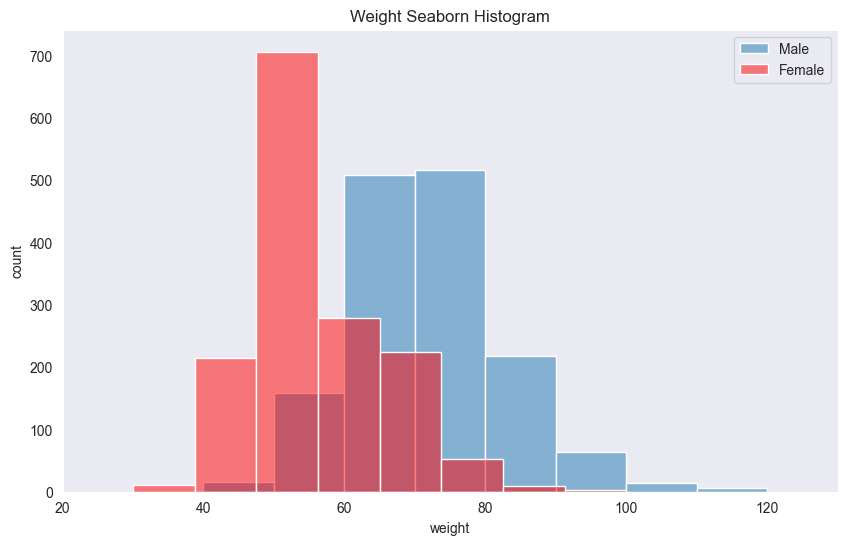

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(maledata['weight'],bins=8,alpha=0.5,label='Male')
sns.histplot(femaledata['weight'],bins=8,alpha=0.5,label='Female'
             ,color='r')
plt.xlim(20,130)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend()
plt.grid()
plt.show()

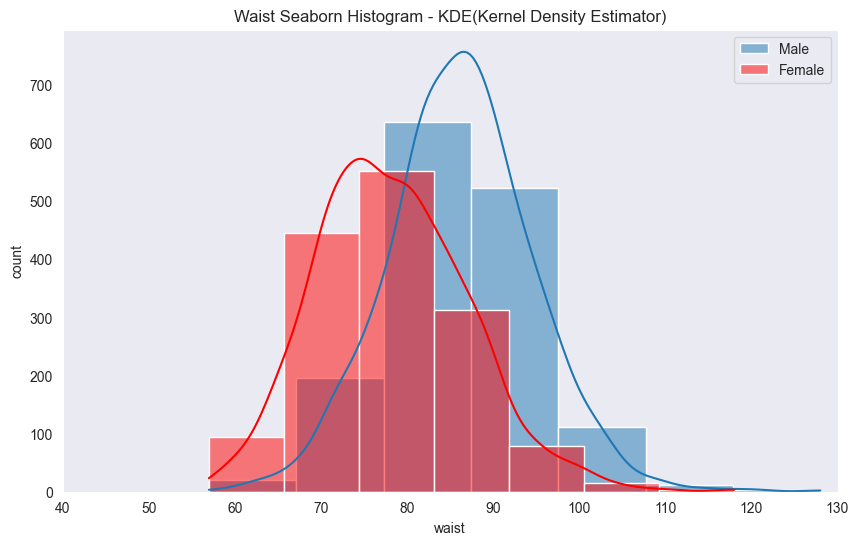

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(maledata['waist'],bins=7,alpha=0.5,label='Male',kde=True)
sns.histplot(femaledata['waist'],bins=7,alpha=0.5,label='Female',kde=True,color='r')
plt.xlim(40,130)
plt.xlabel('waist')
plt.ylabel('count')
plt.title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()

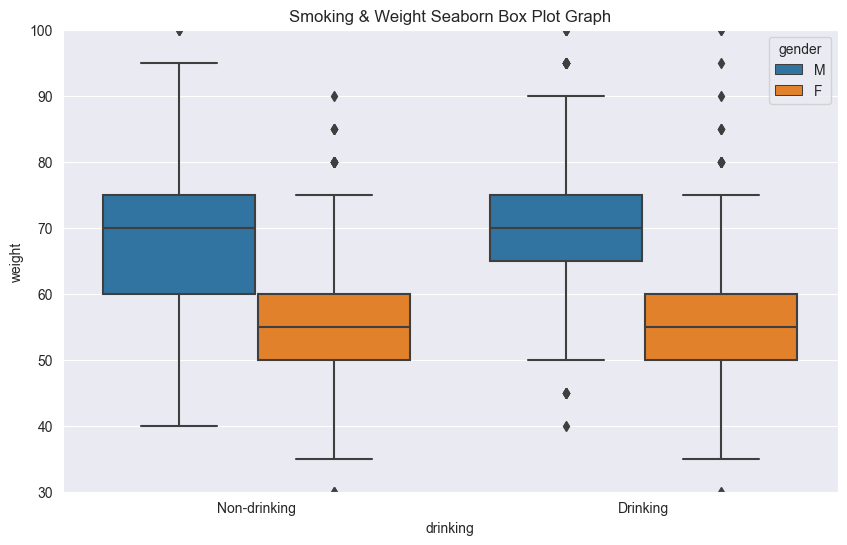

In [38]:
plt.figure(figsize=(10,6))
plt.title('Smoking & Weight Seaborn Box Plot Graph')
sns.boxplot(x='drinking',y='weight',hue='gender', data=data6)
plt.ylim(30,100)
plt.show()

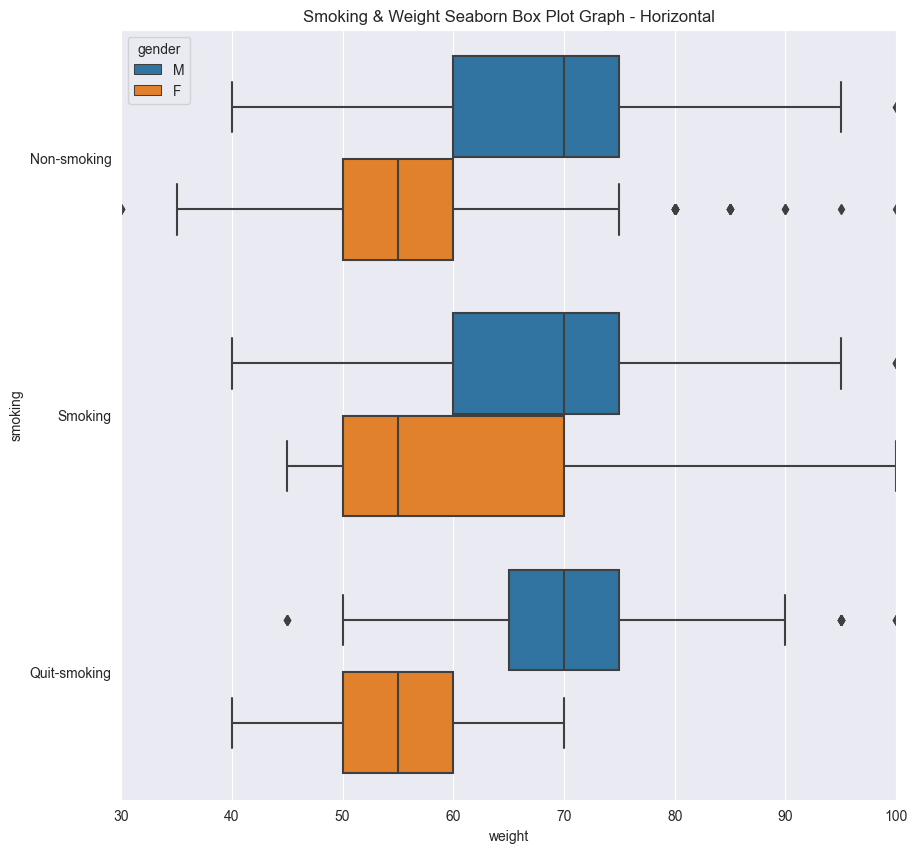

In [39]:
plt.figure(figsize=(10,10))
plt.title('Smoking & Weight Seaborn Box Plot Graph - Horizontal')

sns.boxplot(x='weight',y='smoking',hue='gender', data=data6,orient='h')
plt.xlim(30,100)
plt.show()

<Axes: title={'center': 'Drinking Count Plot Graph'}, xlabel='drinking', ylabel='count'>

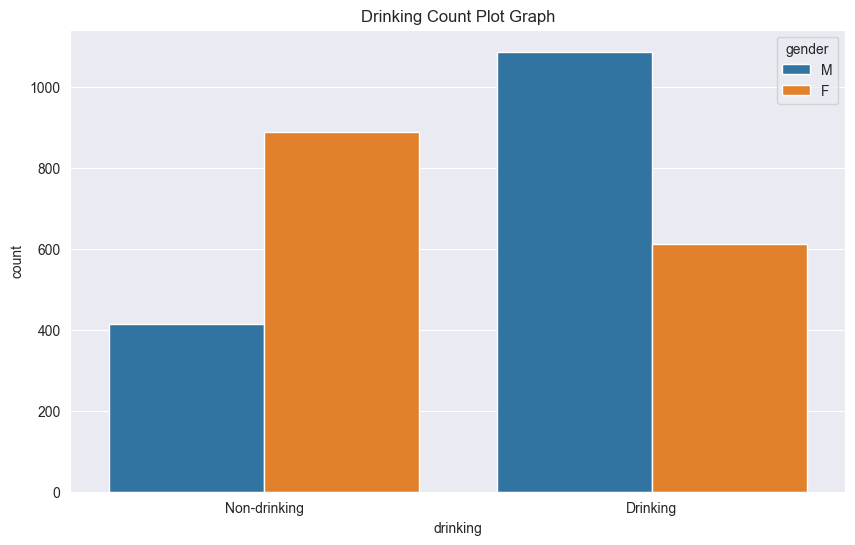

In [40]:
plt.figure(figsize=(10,6))
plt.title('Drinking Count Plot Graph')
sns.countplot(x='drinking',hue='gender',data=data6)


<Axes: title={'center': 'Smoking Count Plot Grapht - Horizontal'}, xlabel='count', ylabel='smoking'>

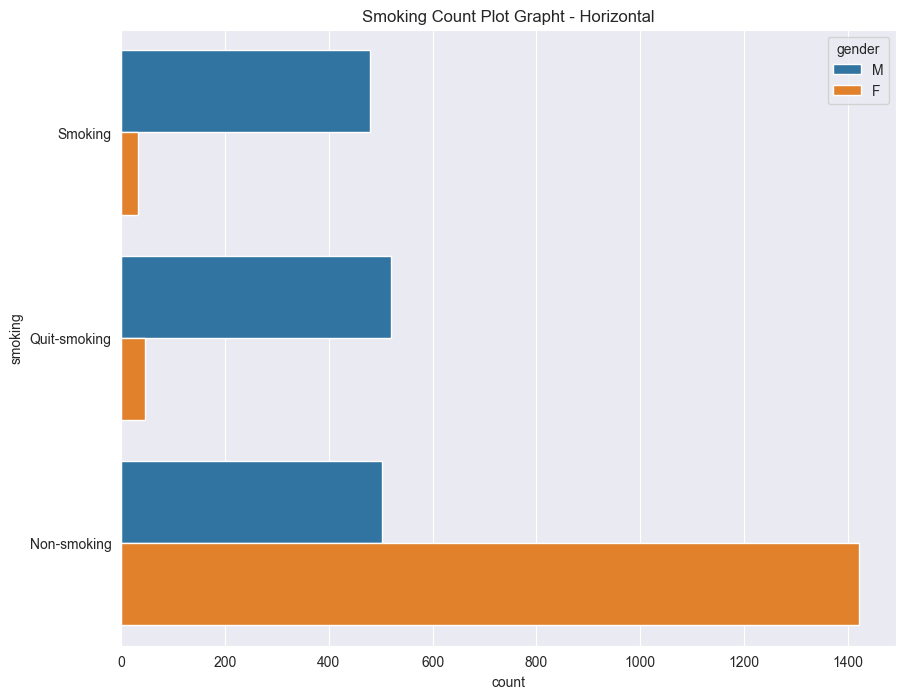

In [41]:
plt.figure(figsize=(10,8))
plt.title('Smoking Count Plot Grapht - Horizontal')
sns.countplot(y='smoking',hue='gender', data=data6, order=['Smoking','Quit-smoking','Non-smoking'])

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gender weight Violin Plot Graph - Drinking category')
sns.violinplot(x='gender',y='weight', hue='drinking',data=data6[data6.weight<120])

In [ ]:
plt.figure(figsize=(7,8))
plt.title('Gender Waist Violin Plot Graph - Drinking category')
sns.violinplot(y='gender',x='waist', hue='drinking',data=data6[data6.weight<150])

In [ ]:
data3 = data.loc[:,['gender','drinking','smoking']]
data8 = data.loc[:,['gender','weight','waist','drinking','smoking','cholesterol','HDL','LDL']]

In [ ]:
plt.figure(figsize=(10,6))
plt.title('3x3Heat Map Graph')
correlation_data3 = data3.corr()
sns.heatmap(correlation_data3,annot=True,cmap='bone')

In [ ]:
plt.figure(figsize=(13,10))
plt.title('8X8Heat Map Graph')
correlation_data8 = data8.corr()
upp_mat = np.tril(correlation_data8)
#upp_mat에서 triu는 반만 보이게 한다. il은 아래가
sns.heatmap(correlation_data8,annot=True,cmap='RdYlGn',mask=upp_mat)


In [ ]:
fg = sns.FacetGrid(data6, col='drinking',height=5,aspect=1.3)
fg.map(sns.histplot,'waist',bins=10,color='g',kde=True)

In [ ]:
fg = sns.FacetGrid(data6,row='gender',col='drinking',height=4.5,aspect=1.5)
fg.map(sns.histplot,'waist',bins=10,color='deeppink',kde=True)

In [ ]:
pp = sns.pairplot(data6,height=3.3,aspect=1.3)

In [ ]:
color = ['#00994C','#FF007F']
pp = sns.PairGrid(data6,hue='gender',palette=color,height=3.3,aspect=1.3)
pp.map_diag(sns.histplot,bins=10)
pp.map_offdiag(sns.kdeplot)
pp.add_legend()